汎化性（サイン関数の多項式回帰）

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

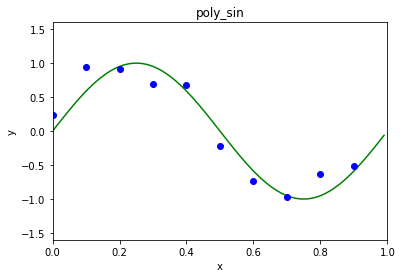

In [6]:
#Sine curve
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

##Training Data
N=10
x_train = np.arange(0, 1, 0.1)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

plt.plot(x_real, y_real, 'g-')
plt.plot(x_train, y_train, 'bo') 
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('poly_sin.eps')
plt.show()
plt.close()

W
 [-0.07664551]


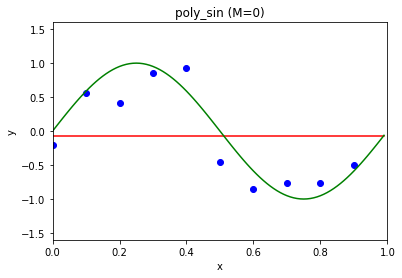

W
 [ 0.58352517 -1.46704595]


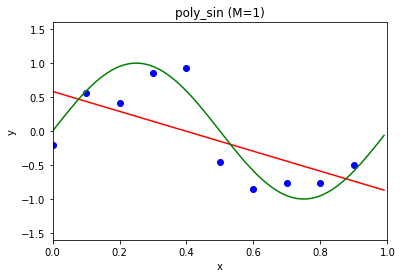

W
 [ -0.26757813  11.07761364 -32.91597873  22.65215024]


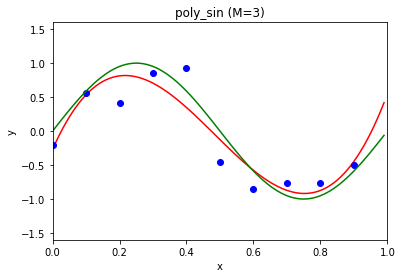

W
 [-2.04353611e-01 -9.55319437e+01  2.92891689e+03 -3.21304456e+04
  1.78458503e+05 -5.62647885e+05  1.04885423e+06 -1.14455912e+06
  6.75784384e+05 -1.66693284e+05]


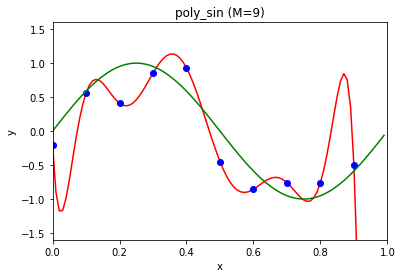

In [5]:
for M in [0,1,3,9]:
    W = E(x_train, y_train, M)
    print('W\n', W)

    y_estimate = [y(x, W, M) for x in x_real]


    plt.plot(x_real, y_estimate, 'r-')
    plt.plot(x_train, y_train, 'bo') 
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%s)" % M)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig('poly_sin_%d.eps' % M)
    plt.show()
    plt.close()